In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
df = pd.read_csv("Data-Collisions.csv")
df.head(2)

/home/tasnima/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N


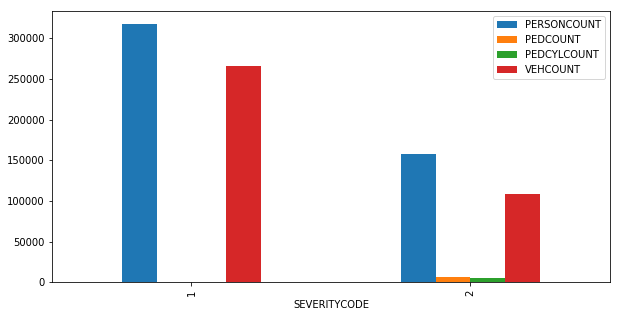

In [40]:
df[['SEVERITYCODE', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT']].groupby('SEVERITYCODE').sum().plot(
    kind='bar', figsize=(10, 5))

In [37]:
df['INCDATE'] = df['INCDATE'].str[:10]
df[['YEAR', 'MONTH', 'DAY']] = df['INCDATE'].str.split('/', expand=True)
df['DayOfWeek'] = pd.to_datetime(df['INCDATE']).dt.dayofweek

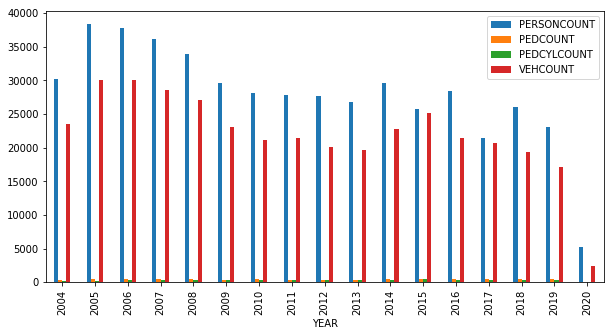

In [35]:
df[['YEAR', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT']].groupby('YEAR').sum().plot(
    kind='bar', figsize=(10, 5))

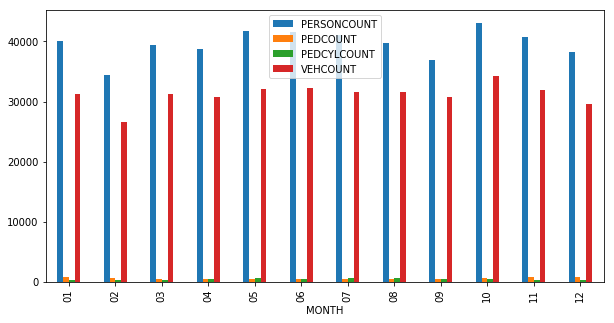

In [36]:
df[['MONTH', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT']].groupby('MONTH').sum().plot(
    kind='bar', figsize=(10, 5))

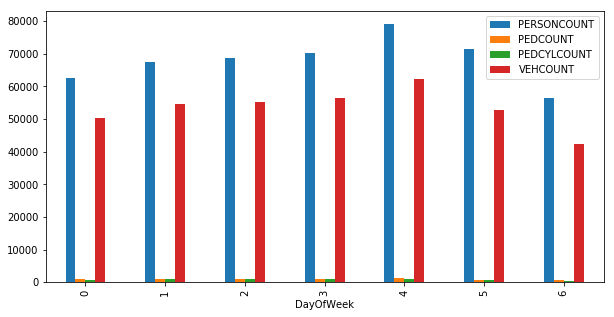

In [38]:
df[['DayOfWeek', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT']].groupby('DayOfWeek').sum().plot(
    kind='bar', figsize=(10, 5))

In [45]:
pre_df = pd.read_csv('preprocessed_dataset.csv')
pre_df.head(2)

,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,UNDERINFL,ST_COLCODE,SEGLANEKEY,CROSSWALKKEY,...,Snow/Slush,Standing Water,Wet,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dark - Unknown Lighting,Dawn,Daylight,Dusk
0,2,2,0,0,2,11,0,10,0,0,...,0,0,1,0,0,0,0,0,1,0
1,1,2,0,0,2,16,0,11,0,0,...,0,0,1,0,0,1,0,0,0,0


In [47]:
pd.get_dummies(df['WEATHER'])

,Blowing Sand/Dirt,Clear,Fog/Smog/Smoke,Other,Overcast,Partly Cloudy,Raining,Severe Crosswind,Sleet/Hail/Freezing Rain,Snowing,Unknown
0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
194668,0,1,0,0,0,0,0,0,0,0,0
194669,0,0,0,0,0,0,1,0,0,0,0
194670,0,1,0,0,0,0,0,0,0,0,0
194671,0,1,0,0,0,0,0,0,0,0,0


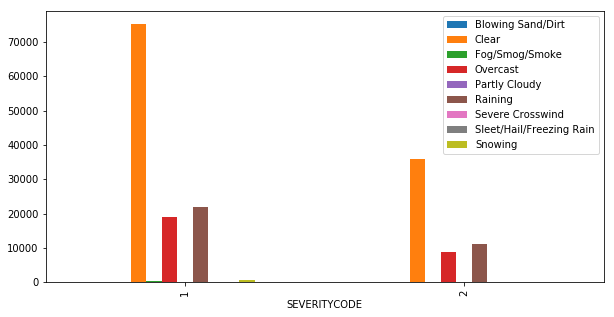

In [55]:
pre_df[['SEVERITYCODE', 'Blowing Sand/Dirt', 'Clear', 'Fog/Smog/Smoke', 'Overcast', 'Partly Cloudy', 'Raining', 
    'Severe Crosswind', 'Sleet/Hail/Freezing Rain', 'Snowing']].groupby('SEVERITYCODE').sum().plot(
    kind='bar', figsize=(10, 5))

In [59]:
pd.get_dummies(df['ADDRTYPE'])

,Alley,Block,Intersection
0,0,0,1
1,0,1,0
2,0,1,0
3,0,1,0
4,0,0,1
...,...,...,...
194668,0,1,0
194669,0,1,0
194670,0,0,1
194671,0,0,1


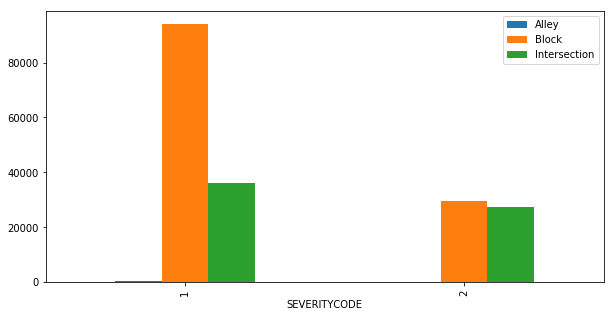

In [60]:
pre_df[['SEVERITYCODE', 'Alley', 'Block', 'Intersection']].groupby('SEVERITYCODE').sum().plot(
    kind='bar', figsize=(10, 5))